1. 부산 기온 데이터 수집
2. 부산에서 가장 더웠던 날은? -> 검색
3. 매년 크리스마스의 최고기온과 최저 기온 추이:plot
4. 월별 기온 데이터 : boxpot

//ta_20220921111634

In [5]:
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [6]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 데이터 로드
df = pd.read_csv('./data/ta_20220921111634.csv', header=6) # 불러드릴 row위치 지정
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


In [8]:
df.rename(columns={df.columns[2]:'평균기온',
                   df.columns[3]:'최저기온', 
                   df.columns[4]:'최고기온'}, inplace=True)

In [9]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


In [10]:
df_temp = df.sort_values(by=['최고기온'], ascending=False)
df_temp.iloc[:1,[0,4]]

,날짜,최고기온
41035,2016-08-14,37.3


In [11]:
cris_df = df[df['날짜'].str.contains('12-25')]

In [12]:
cris_df.head()

,날짜,지점,평균기온,최저기온,최고기온
260,1904-12-25,159,2.5,-1.5,7.7
625,1905-12-25,159,11.6,10.5,14.8
990,1906-12-25,159,0.3,-4.8,3.8
1355,1907-12-25,159,9.1,5.3,13.9
1721,1908-12-25,159,3.8,-0.6,9.1


In [13]:
cris_df = cris_df[['날짜','최저기온','최고기온']]

In [14]:
cris_df.head()


,날짜,최저기온,최고기온
260,1904-12-25,-1.5,7.7
625,1905-12-25,10.5,14.8
990,1906-12-25,-4.8,3.8
1355,1907-12-25,5.3,13.9
1721,1908-12-25,-0.6,9.1


Text(0, 1, 'high temperature (℃)')

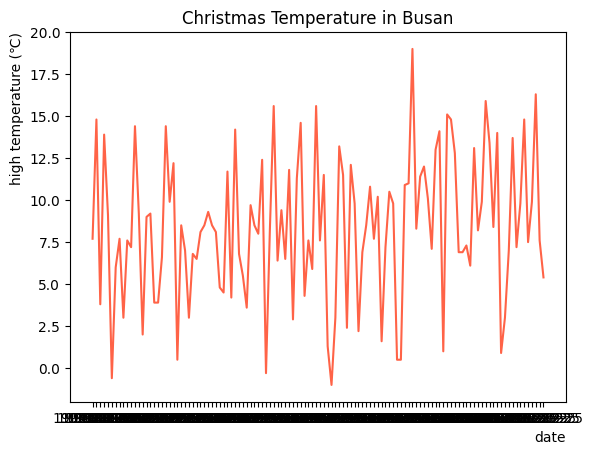

In [15]:
#매년 크리스마스의 최고기온 추이
plt.plot(cris_df['날짜'],cris_df['최고기온'],color='tomato')
plt.title('Christmas Temperature in Busan')
plt.xlabel('date', loc='right')
plt.ylabel('high temperature (℃)', loc='top')

Text(0, 1, 'row temperature (℃)')

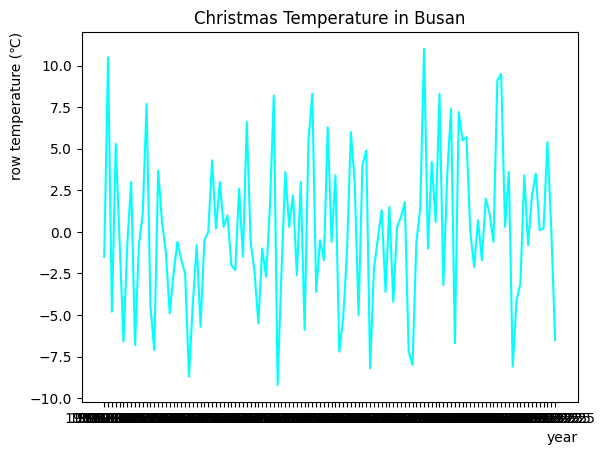

In [16]:
#매년 크리스마스의 최저기온 추이
plt.plot(cris_df['날짜'],cris_df['최저기온'],color='cyan')
plt.title('Christmas Temperature in Busan')
plt.xlabel('year', loc='right')
plt.ylabel('row temperature (℃)', loc='top')

Text(0, 1, 'temperature (℃)')

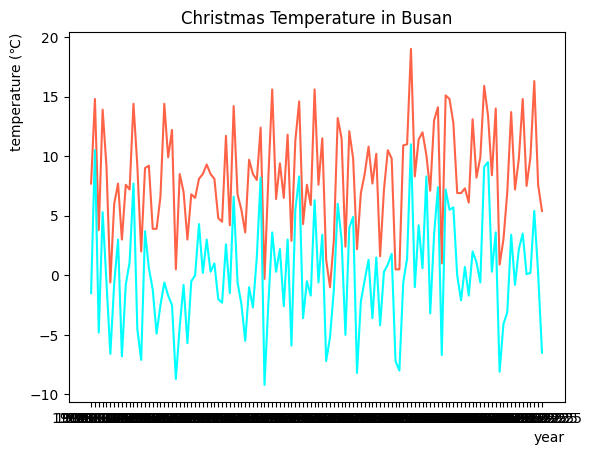

In [17]:
plt.plot(cris_df['날짜'],cris_df['최고기온'],color='tomato')
plt.plot(cris_df['날짜'],cris_df['최저기온'],color='cyan')
plt.title('Christmas Temperature in Busan')
plt.xlabel('year', loc='right')
plt.ylabel('temperature (℃)', loc='top')

In [18]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


In [19]:
# 날짜 데이터 Str => date 형으로 변환
df['날짜'] = df['날짜'].astype('datetime64')

In [20]:
#년도/월별 데이터 조회
target_day = 1 
df.query('날짜.dt.day == @target_day')

,날짜,지점,평균기온,최저기온,최고기온
22,1904-05-01,159,13.7,12.8,15.3
53,1904-06-01,159,17.6,13.8,22.1
83,1904-07-01,159,23.7,22.2,27.3
114,1904-08-01,159,26.2,22.7,30.3
145,1904-09-01,159,22.4,20.2,25.4
...,...,...,...,...,...
43121,2022-05-01,159,14.8,11.5,19.1
43152,2022-06-01,159,22.2,18.5,27.5
43182,2022-07-01,159,25.9,21.7,29.9
43213,2022-08-01,159,27.5,26.2,30.5


In [21]:
#데이터 로드
df = pd.read_csv('./data/ta_20220921111634.csv', header=6)
df.rename(columns={df.columns[2]:'평균기온',
                   df.columns[3]:'최저기온', 
                   df.columns[4]:'최고기온'}, inplace=True)

# 결측 데이터 삭제
df.dropna(inplace=True)
df['날짜'] = df['날짜'].astype('datetime64')

# 날짜 데이터 Str => date 형으로 변환
#df['날짜'] = df['날짜'].astype('datetime64')


In [22]:
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

In [26]:

month = []
for i in range(1, 13):
  month.append(df.loc[df['월'] == i, '평균기온'])


C:\Users\sian\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sian\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sian\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sian\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sian\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) miss

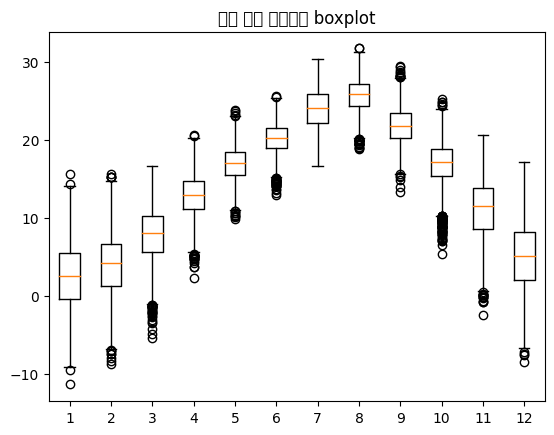

In [24]:

plt.title("부산 월별 평균기온 boxplot")
plt.boxplot(month)
plt.show() 